In [1]:
import pandas as pd
!pip install scikit-learn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import os
import matplotlib.pyplot as plt    
import seaborn as sns      
import joblib

In [2]:
to_train = pd.read_csv('/home/rpierson/PiersonREU/extracted/train_dataset.csv')
data = to_train.copy()
priority = pd.read_csv('/home/rpierson/PiersonREU/extracted/train_priority.csv')

In [3]:
data

,Issue_id,Priority,Title,Description,Component,Combined_Text,Topic
0,1,P3,Usability issue with external editors (1GE6IRL),- Setup a project that contains a *.gif resour...,Team,"['Usability', 'issue', 'external', 'editors', ...",5
1,13,P3,CC Discussion: local versioning (1GAT3PL),Would it make sense to have a (the?) projects ...,Team,"['CC', 'Discussion', 'local', 'versioning', '1...",5
2,12,P3,Manage/unmanage support and policies (1GALAEG),Currently every new resource added to a shared...,Team,"['Manage/unmanage', 'support', 'policies', '1G...",5
3,11,P3,API: ISharingManager::load mapping vcm project...,Jean-Michel (08/02/2001 1:38:48 PM); ; The ISh...,Team,"['API', 'ISharingManager', ':load', 'mapping',...",5
4,10,P3,API - VCM event notification (1G8G6RR),There seems to be a need for a VCM Event notif...,Team,"['API', 'VCM', 'event', 'notification', '1G8G6...",5
...,...,...,...,...,...,...,...
68119,229777,P3,[Viewers] Wrong argument in the first statemen...,Build ID: 3.3 (I am not sure what You mean by ...,UI,"['Viewers', 'Wrong', 'argument', 'first', 'sta...",7
68120,229779,P3,NPE in performance tests,There are several NPEs within the UI session t...,UI,"['NPE', 'performance', 'tests', 'several', 'NP...",7
68121,229782,P3,Performance tests for ICU Collator,I20080501-0100; ; Now that were using the coll...,UI,"['Performance', 'tests', 'ICU', 'Collator', 'I...",7
68122,229789,P3,[Examples] examples plugins create duplicate m...,Created attachment 98318; screenshot; ; I20080...,UI,"['Examples', 'examples', 'plugins', 'create', ...",9


In [4]:
data['Combined_Text'][0:1]

0    ['Usability', 'issue', 'external', 'editors', ...
Name: Combined_Text, dtype: object

In [5]:
texts = data['Combined_Text'].tolist()

In [6]:
vectorizer = CountVectorizer() #Part of Sklearn, converts into matrix of token counts

In [7]:
x = vectorizer.fit_transform(texts) #turns data into vectors

In [22]:
num_topics = 10
lda = LatentDirichletAllocation(n_components=num_topics,
    random_state=0) #Specifics of this model, ten topics

In [9]:
lda.fit(x) #Run through our data

LatentDirichletAllocation(random_state=0)

In [10]:
topic_distributions = lda.transform(x) #Method to get topic dists for each bug
topics = []

In [11]:
for topic_dist in topic_distributions:
    dominant_topic = topic_dist.argmax()
    topics.append(dominant_topic)

In [12]:
data['Topic'] = topics

In [13]:
data

,Issue_id,Priority,Title,Description,Component,Combined_Text,Topic
0,1,P3,Usability issue with external editors (1GE6IRL),- Setup a project that contains a *.gif resour...,Team,"['Usability', 'issue', 'external', 'editors', ...",5
1,13,P3,CC Discussion: local versioning (1GAT3PL),Would it make sense to have a (the?) projects ...,Team,"['CC', 'Discussion', 'local', 'versioning', '1...",5
2,12,P3,Manage/unmanage support and policies (1GALAEG),Currently every new resource added to a shared...,Team,"['Manage/unmanage', 'support', 'policies', '1G...",5
3,11,P3,API: ISharingManager::load mapping vcm project...,Jean-Michel (08/02/2001 1:38:48 PM); ; The ISh...,Team,"['API', 'ISharingManager', ':load', 'mapping',...",5
4,10,P3,API - VCM event notification (1G8G6RR),There seems to be a need for a VCM Event notif...,Team,"['API', 'VCM', 'event', 'notification', '1G8G6...",5
...,...,...,...,...,...,...,...
68119,229777,P3,[Viewers] Wrong argument in the first statemen...,Build ID: 3.3 (I am not sure what You mean by ...,UI,"['Viewers', 'Wrong', 'argument', 'first', 'sta...",7
68120,229779,P3,NPE in performance tests,There are several NPEs within the UI session t...,UI,"['NPE', 'performance', 'tests', 'several', 'NP...",7
68121,229782,P3,Performance tests for ICU Collator,I20080501-0100; ; Now that were using the coll...,UI,"['Performance', 'tests', 'ICU', 'Collator', 'I...",7
68122,229789,P3,[Examples] examples plugins create duplicate m...,Created attachment 98318; screenshot; ; I20080...,UI,"['Examples', 'examples', 'plugins', 'create', ...",9


In [14]:
data.groupby('Topic').count()

,Issue_id,Priority,Title,Description,Component,Combined_Text
Topic,,,,,,
0,2832,2832,2832,2832,2832,2832
1,2349,2349,2349,2349,2349,2349
2,348,348,348,348,348,348
3,450,450,450,450,450,450
4,4817,4817,4817,4817,4817,4817
5,8306,8306,8306,8306,8306,8306
6,782,782,782,782,782,782
7,15895,15895,15895,15895,15895,15895
8,4865,4865,4865,4865,4865,4865


In [15]:

extract_dir = '/home/rpierson/PiersonREU/extracted'
data_file = os.path.join(extract_dir, 'train_dataset.csv')
data.to_csv(data_file, index = False)

In [16]:
gr = data.groupby('Topic')['Combined_Text'].count()
gr

Topic
0     2832
1     2349
2      348
3      450
4     4817
5     8306
6      782
7    15895
8     4865
9    27480
Name: Combined_Text, dtype: int64

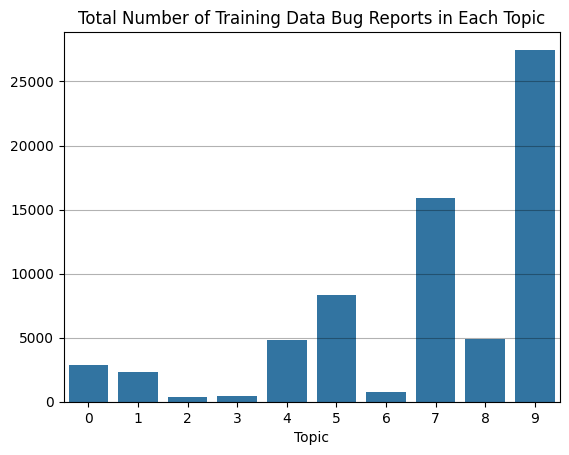

In [17]:
plt.xticks(rotation = 0)
plt.grid(axis='y', color='black', alpha=0.3)
plt.title('Total Number of Training Data Bug Reports in Each Topic')

# Here we use plot the grouped index on the x axis and the values on the y axis
sns.barplot(x = gr.index, y = gr.values)

plt.show()

In [19]:
extract_dir = '/home/rpierson/PiersonREU/extracted'
lda_file = os.path.join(extract_dir, 'lda.pkl')
joblib.dump(lda, lda_file)
#lda.to_pkl(data_file, index = False)

vec_file = os.path.join(extract_dir, 'vec.pkl')
joblib.dump(vectorizer, vec_file)
#vectorizer.to_pkl(vec_file, index = False)

['/home/rpierson/PiersonREU/extracted/vec.pkl']

In [20]:
joblib.dump(lda, lda_file)
joblib.dump(vectorizer, vec_file)

['/home/rpierson/PiersonREU/extracted/vec.pkl']

In [26]:
label_map = {'P1': 1, 'P2': 2, 'P3': 3, 'P4': 4, 'P5': 5}
data['Priority'] = data['Priority'].map(label_map)

In [36]:
extract_dir = '/home/rpierson/Topic_Files'

topic_data = {topic_label: {'Combined_Text': [], 'Priority': []} for topic_label in range(num_topics)}

# Accumulate data for each topic
for index, row in data.iterrows():
    topic_label = row['Topic']
    content = row['Combined_Text']
    priority = row['Priority']
    
    topic_data[topic_label]['Combined_Text'].append(content)
    topic_data[topic_label]['Priority'].append(priority)

# Write each topic's data to a CSV file
for topic_label, data_dict in topic_data.items():
    df = pd.DataFrame(data_dict)
    csv_file_path = f'{extract_dir}/topic_{topic_label}.csv'
    df.to_csv(csv_file_path, index=False)

print("Files have been written successfully.")


Files have been written successfully.
